# A Text-Mining Comparison of Emily Dickinson and Walt Whitman
-----------------------------------------------------------------------------------------------------------

Informed by examples from https://www.nltk.org/book/:

Bird, Steven, Ewan Klein, and Edward Loper (2015). _Natural Language Processing with Python_. Accessed 2018-10-16 from https://www.nltk.org/book/.

In this tutorial, we will explore the NLTK _corpus_, _text_, and (to a lesser extent) _tokenize_ and _tag_ modules to analyze differences between two American poets, Emily Dickinson and Walt Whitman. In particular, we will

* compare aspects of form including stanza and sentence (not line!) length
* explore vocabulary usage and context

### About Emily Dickinson and Walt Whitman

But first a quick word about our choice of poets. For the purposes of comparison, Dickinson and Whitman are ideal because they were contemporaries who over time have had a tremendous impact on American poetry. Their works are idiosyncratic - stylicstically, the works of both poets are nothing like those of the other (or of anyone else, for that matter).

By way of example:

[Whitman's _Song of Myself_](https://www.poetryfoundation.org/poems/45477/song-of-myself-1892-version)


[Dickinson's _Because I could not stop for Death_](https://www.poetryfoundation.org/poems/47652/because-i-could-not-stop-for-death-479)

So there is a strong visual and aesthetic difference between the two poets. But what if we wanted our home assistant to find and read out loud poetry that is more similar to Dickinson's and less similar to Whitman's? What would _similar_ mean to a machine? Can these stylistic differences be quantified? NLP gives us some insight into this question.

But first, we will familiarize ourselves with some of the basics of NLTK and the modules referenced above.

In [2]:
import nltk
import numpy as np
import matplotlib
import requests

# Import modules

from nltk.tokenize.stanford import StanfordTokenizer
from nltk.corpus import gutenberg, stopwords
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.probability import *
from nltk.text import *
from nltk import word_tokenize, draw

In [3]:
# NLTK data need to be downloaded separately. Uncomment and run the next line the first time this notebook is run
# on a new system.

# nltk.download() # use id 'all' to download all, or 'gutenberg' and 'stopwords' to download the corpora used in this notebook

### The _Gutenberg_ Corpus

This corpus consists of a selection of public domain texts from Project Gutenberg ([https://www.gutenberg.org/](https://www.gutenberg.org/)). It is an example of a plaintext corpus.

There are a variety of corpora, each of which demonstrate different NLTK methods and capabilities. More info is available from

* NLTK documentation ([https://www.nltk.org/api/nltk.corpus.html](https://www.nltk.org/api/nltk.corpus.html))
* NLTK Corpora ([http://www.nltk.org/nltk_data/](http://www.nltk.org/nltk_data/))

While not as complex as other corpora and modules, the Gutenberg corpus and plaintext corpus reader provide everything we need to drill down into the structure and vocabulary contexts of particular authors and literary works.

In [4]:
# These are the texts in Gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Available methods give us access to the text at different levels of granularity. The corresponding data types and structures are as given in the documentation:

* characters (strings)
* words (a list of strings)
* sentences (a list of lists of strings)
* paragraphs (a list of lists of lists of strings)

Without being overly complex, these different levels of nesting allow us to quickly compare word, sentence, and paragraph lengths across texts. These are important aspects of particular texts and an author's style of writing.

In [5]:
mdRaw = gutenberg.raw('melville-moby_dick.txt')
print(len(mdRaw)) # this gives us the number of characters, including whitespace

1242990


In [6]:
#mdRaw

In [7]:
mdWords = gutenberg.words('melville-moby_dick.txt') # list of words and punctuation
print(len(mdWords)) # this gives us a count of TOKENS - words, punctuation, etc.

260819


In [8]:
mdWords[0:10] # if we look at mdRaw, we see that the brackets around the title/author are in the raw text

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [9]:
mdSents = gutenberg.sents('melville-moby_dick.txt')
print(len(mdSents))

10059


In [10]:
mdSents

[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']'], ['ETYMOLOGY', '.'], ...]

In [11]:
mdParas = gutenberg.paras('melville-moby_dick.txt')
print(len(mdParas))

2793


In [12]:
mdParas

[[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']], [['ETYMOLOGY', '.']], ...]

We can calculate some useful averages accordingly.

Using a function provided by the _NLTK Book_ [https://www.nltk.org/book/ch01.html](https://www.nltk.org/book/ch01.html), we can also calculate the _lexical diversity_, or the percentage of distinct words, in a text.


In [13]:
# Calculate averages - use 'isalpha()' method to remove punctuation (note this also removes dates, money, and other 
# potentially interesting tokens...)

# Word length in characters

def avgWordLength(wordList):
    totalWords = 0
    totalChars = 0
    for w in wordList:
        if w.isalpha():
            totalWords += 1
            totalChars += len(w)
    print("Total characters:", totalChars)
    print("Total words:", totalWords)
    print("Average word length in characters:", totalChars / totalWords)
    return

# Sentence length in words

def avgSentLength(sentList):
    totalSents = len(sentList)
    totalWords = 0
    for s in sentList:
        sentLength = 0
        for w in s:
            if w.isalpha():
                sentLength += 1
        totalWords += sentLength
    print("Total words:", totalWords)
    print("Total sentences:", totalSents)
    print("Average sentence length in words:", totalWords / totalSents)
    return

# Paragraph length in words and sentences

def avgParaLength(paraList):
    totalParas = len(paraList)
    totalSents = 0
    totalWords = 0
    for p in paraList:
        totalSents += len(p)
        for s in p:
            sentLength = 0
            for w in s:
                if w.isalpha():
                    sentLength += 1
            totalWords += sentLength
    print("Total words:", totalWords)
    print("Total sentences:", totalSents)
    print("Total paragraphs:", totalParas)
    print("Average paragraph length in sentences:", totalSents / totalParas)
    print("Average paragraph length in words:", totalWords / totalParas)
    return

In [14]:
avgWordLength(mdWords)

Total characters: 951935
Total words: 218361
Average word length in characters: 4.35945521407211


In [15]:
avgSentLength(mdSents)

Total words: 218361
Total sentences: 10059
Average sentence length in words: 21.708022666269013


In [16]:
avgParaLength(mdParas)

Total words: 218361
Total sentences: 10059
Total paragraphs: 2793
Average paragraph length in sentences: 3.601503759398496
Average paragraph length in words: 78.18152524167562


In [17]:
# Lexical diversity - from https://www.nltk.org/book/ch01.html

# Note - creating a set of words in wordList removes duplicates

def lexical_diversity(wordList):
    return len(set(wordList))/len(wordList)


# Some refinements

# This first may be too greedy, as it ignores part of speech:
#     "Smith took his harpoon to the smith" will be treated as one 'smith'
#     "Ford raced her horse across the ford" will be treated as one 'ford'

def lex_div_alpha_lc(wordList):
    alpha_lc = []
    for w in wordList:
        if w.isalpha():
            alpha_lc.append(w.lower())
    return len(set(alpha_lc))/len(alpha_lc)

# This second refinement includes part of speech
# May not be greedy enough?

def lex_div_alpha_pos(wordList):
    alpha_pos = []
    pos = nltk.pos_tag(wordList)
    for w in pos:
        if w[0].isalpha():
            alpha_pos.append(w)
    return len(set(alpha_pos))/len(alpha_pos)
            

In [18]:
lexical_diversity(mdWords)

0.07406285585022564

In [19]:
lex_div_alpha_lc(mdWords)

0.07761459234936642

In [20]:
lex_div_alpha_pos(mdWords) # this takes a moment

0.1150480168161897

### Try it!

Using the functions and methods demonstrated above - 

1. Compare the lexical diversity of William Blake and John Milton
2. Compare the average word, sentence, and paragraph lengths of works by Jane Austen and G.K. Chesterton

Be sure to run all the code blocks above this one before attempting any comparisons!

In [21]:
# Some helper functions

def plainTextFeatures(text):
    tWords = gutenberg.words(text)
    tSents = gutenberg.sents(text)
    tParas = gutenberg.paras(text)
    return tWords, tSents, tParas

t1 = 'blake-poems.txt' # replace as needed
t2 = 'milton-paradise.txt' # replace as needed

t1Words, t1Sents, t1Paras = plainTextFeatures(t1)
t2Words, t2Sents, t2Paras = plainTextFeatures(t2)

## Creating a Plaintext Corpus

We can apply these methods and functions to our comparison of the poetry of Emily Dickinson and Walt Whitman. Since we don't already have any of Dickinson's poetry available to us in an existing corpus, we need to download some of her poetry and create a corpus with it.

Since _Leave of Grass_ is already in the _gutenberg_ corpus, we might use that. However, since that copy of the text has probably been through more rigorous pre-processing than we intend to do here, we will level the playing field by also downloading a new copy of that text. All works in this example are from _Project Gutenberg_.

**NOTE:** As noted above, line breaks and punctuation are aspects of poetic form and reflect deliberate choices made by poets. While we may in this example make some association between pararaphs and stanzas, we should not make any similar association between lines and sentences. 

In [22]:
# Use the following lines to download texts from Project Gutenberg
# Note however that for this tutorial we have done some pre-processing

r = requests.get('https://www.gutenberg.org/files/12242/12242.txt')
emily = r.text
with open('poetry/emily_dickinson_raw.txt', 'w', encoding='latin-1') as e:
    e.write(emily)
    e.close()
    
r = requests.get('https://www.gutenberg.org/files/1322/1322.txt')
walt = r.text
with open('poetry/walt_whitman_raw.txt', 'w', encoding='latin-1') as w:
    w.write(walt)
    w.close()

Right now these are just text files in a directory. We can't use any of the plaintext corpus reader methods on them until we intialize a new corpus.

In [23]:
am_poets = PlaintextCorpusReader('poetry/', '.*')

In [24]:
am_poets.fileids()

['emily_dickinson_edit.txt',
 'emily_dickinson_raw.txt',
 'walt_whitman_edit.txt',
 'walt_whitman_raw.txt']

That's it! Now we can use any of the functions above to make some comparisons.

In [25]:
def poetsTextFeatures(text):
    tWords = am_poets.words(text)
    tSents = am_poets.sents(text)
    tParas = am_poets.paras(text)
    return tWords, tSents, tParas

ed = 'emily_dickinson_edit.txt' # we can also use the raw downloaded files if we want
ww = 'walt_whitman_edit.txt'

edWords, edSents, edParas = poetsTextFeatures(ed)
wwWords, wwSents, wwParas = poetsTextFeatures(ww)

In [26]:
# Note that our corpus is probably not balanced in terms of volume of work per poet.

print("Dickinson associated word, sentence, and paragraph counts:", len(edWords), len(edSents), len(edParas))
print("Whitman associated word, sentence, and paragraph counts:", len(wwWords), len(wwSents), len(wwParas))

Dickinson associated word, sentence, and paragraph counts: 37156 2487 1977
Whitman associated word, sentence, and paragraph counts: 154453 4252 2479


Comparing word length:

In [27]:
print('Dickinson:')
avgWordLength(edWords)

Dickinson:
Total characters: 126844
Total words: 30184
Average word length in characters: 4.202358865624172


In [28]:
print('Whitman:')
avgWordLength(wwWords)

Whitman:
Total characters: 542371
Total words: 126300
Average word length in characters: 4.2943072050673


Compare sentence (not line!) length:

In [29]:
print('Dickinson:')
avgSentLength(edSents)

Dickinson:
Total words: 30184
Total sentences: 2487
Average sentence length in words: 12.136710896662645


In [30]:
print('Whitman:')
avgSentLength(wwSents)

Whitman:
Total words: 126300
Total sentences: 4252
Average sentence length in words: 29.703668861712135


Compare paragraph (and maybe stanza) length:

In [31]:
print('Dickinson:')
avgParaLength(edParas)

Dickinson:
Total words: 30184
Total sentences: 2487
Total paragraphs: 1977
Average paragraph length in sentences: 1.2579666160849772
Average paragraph length in words: 15.267577137076378


In [32]:
print('Whitman:')
avgParaLength(wwParas)

Whitman:
Total words: 126300
Total sentences: 4252
Total paragraphs: 2479
Average paragraph length in sentences: 1.7152077450584913
Average paragraph length in words: 50.947962888261394


Compare lexical diversity

In [33]:
print('Dickinson:')
print("NLTK book method:", lexical_diversity(edWords))
print('Lowercase alpha method:', lex_div_alpha_lc(edWords))
print('POS alpha method:', lex_div_alpha_pos(edWords))

Dickinson:
NLTK book method: 0.17426525998492842
Lowercase alpha method: 0.1840710310098065
POS alpha method: 0.25503578054598464


In [34]:
print('Whitman:')
print("NLTK book method:", lexical_diversity(wwWords))
print('Lowercase alpha method:', lex_div_alpha_lc(wwWords))
print('POS alpha method:', lex_div_alpha_pos(wwWords))

Whitman:
NLTK book method: 0.09273371187351492
Lowercase alpha method: 0.09754552652414886
POS alpha method: 0.147513855898654


### Frequency Distributions and Plotting

Before moving on to vocabulary and context, let's explore some NLTK methods for creating and plotting frequency distributions. These allow us to go beyond averages and drill down more deeply into the structure of our corpus.

In [35]:
# FreqDist methods are part of the NLTK probability module:
# https://www.nltk.org/api/nltk.html#module-nltk.probability

# Frequency distribution of sentence lengths

ws_fdist = FreqDist(len(s) for s in wwSents)
es_fdist = FreqDist(len(s) for s in edSents)

# Frequency distribution of paragraph/stanza lengths (in sentences not words)

wp_fdist = FreqDist(len(p) for p in wwParas)
ep_fdist = FreqDist(len(p) for p in edParas)

# Frequency distribution of paras/stanzas by number of words
# 'wps' = words per stanza

wpb = []
for p in wwParas:
    pwc = 0
    for s in p:
        pwc += len(s)
    wpb.append(pwc)
wwps_fdist = FreqDist(wpb)

epb = []
for p in edParas:
    pwc = 0
    for s in p:
        pwc += len(s)
    epb.append(pwc)
ewps_fdist = FreqDist(epb)

Comment and uncomment lines below to compare difference frequency distributions.

In [36]:
# Print and plot the 20 most common occurrences 

# ws_fdist.most_common(20) # most common sentence lengths in words - note this includes punctuation!
wp_fdist.most_common(20) # most common stanza lengths in sentences
# wwps_fdist.most_common(20) # most common stanza lengths in words (including punctuation)

[(1, 1800),
 (2, 338),
 (3, 140),
 (4, 78),
 (5, 41),
 (6, 26),
 (8, 10),
 (7, 10),
 (10, 10),
 (9, 6),
 (14, 4),
 (12, 3),
 (11, 3),
 (23, 2),
 (13, 2),
 (45, 1),
 (20, 1),
 (56, 1),
 (17, 1),
 (28, 1)]

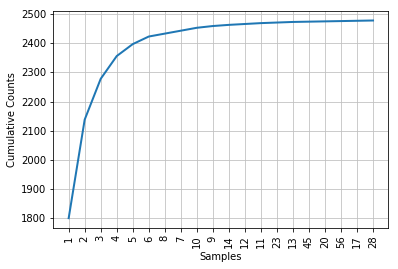

In [73]:
# ws_fdist.plot(20, cumulative=True)
wp_fdist.plot(20, cumulative=True) # 2479 paras/stanzas
# wwps_fdist.plot(20, cumulative=True)

In [38]:
# es_fdist.most_common(20) # most common sentence lengths in words - note this includes punctuation!
ep_fdist.most_common(20) # most common stanza lengths in sentences
# ewps_fdist.most_common(20) # most common stanza lengths in words (including punctuation)

[(1, 1648), (2, 219), (3, 67), (4, 26), (5, 9), (6, 6), (7, 1), (8, 1)]

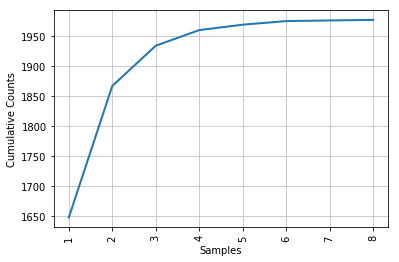

In [39]:
# es_fdist.plot(20, cumulative=True)
ep_fdist.plot(20, cumulative=True) # 1977 paras/stanzas
# ewps_fdist.plot(20, cumulative=True)

How - if at all - do these results align with our impressions of each poet's work?

### Exploring Context with the NLTK Text Module

By now we have given our home assistant something to work with if we were to ask for poetry similar to Emily Dickinson's but not similar to Walt Whitman's. 

But what if in our case _similar_ has less to do with structure and more to do with tone or imagery? That is, what if we want poetry that is similar in terms of tone, imagery, and context? This is of course a much more complicated query and involves a lot more in truth than a basic analysis of vocabulary use. However, a basic analysis of vocabulary use gives us a pretty good start towards addressing this question as well as characterizing the complexities surrounding it.

To do this, we need to move beyond plaintext corpus reader methods and initialize our texts as instances of the NLTK Text module. This module provides methods for analyzing context through collocations, concordances, and similarities across word occurrences.

In [40]:
# Initialize as Text and ContextIndex objects
# https://www.nltk.org/api/nltk.html#module-nltk.text

waltText = Text(am_poets.words(ww))
emilyText = Text(am_poets.words(ed))

# ContextIndex object provides a token list that we will need later

waltContextIndex = ContextIndex(am_poets.words(ww))
emilyContextIndex = ContextIndex(am_poets.words(ed))

As we start to analyze vocabulary and context, one immediate problem we have is how to identify interesting vocabulary.
Do we look for long words or phrases? Do we sort by part of speech?

For this tutorial, we're going to work a little backwards and start by demonstrating some of the methods for exploring context. This is kind of a cheat but not really, because

* "Interesting" is subjective
* Text module methods by themselves are useful for surfacing interesting vocabulary use

Collocations provide an immediate example. Collocations are expressions of multiple words which commonly co-occur.

In [41]:
print('Walt Whitman collocations:\n') # use the 'window_size' argument to expand the context
waltText.collocations()
print('\n')
waltText.collocations(window_size=3) # pairs of words that commonly occur in three-word samples

print('\nEmily Dickinson collocations:\n')
emilyText.collocations()
print('\n')
emilyText.collocations(window_size=3)

# Increase the window_size to see how the collocations change!

Walt Whitman collocations:

young men; open air; Walt Whitman; young man; New World; every one;
every thing; whole earth; Thou knowest; thousand years; Old Age; old
man; shapes arise; little child; old age; centuries hence; thousand
miles; became part; every day; comes back


men women; young men; man woman; open air; day night; North South;
Walt Whitman; Time Space; young man; New World; every one; male
female; live oak; every thing; Good bye; thousand years; whole earth;
East West; South North; Thou knowest

Emily Dickinson collocations:

Emily Dickinson; human nature; LOOMIS TODD; MABEL LOOMIS; little boat;
Wild nights; little figure; little maid; EMILY DICKINSON; FORBIDDEN
FRUIT; dainty reminder; personal origin; never saw; hour ago; writing
delinquencies; Series Edited; regions wild; settled regions; Next
time; ages steal


Emily Dickinson; human nature; little maid; LOOMIS TODD; MABEL LOOMIS;
MABEL TODD; Wild nights; little boat; TIME ETERNITY; little figure;
hour ago; never saw;

Concordances allows us to see how specific words are used in context. Based on the collocations, a word that might be interesting to look at is _little_.

In [42]:
waltText.concordance('little')

Displaying 25 of 25 matches:
my book ! spread your white sails my little bark athwart the imperious waves , C
Why even I myself I often think know little or nothing of my real life , Only a 
y of the States , Resist much , obey little , Once unquestioning obedience , onc
n the fields , And brown ants in the little wells beneath them , And mossy scabs
 , and cannot be shaken away . 8 The little one sleeps in its cradle , I lift th
 wet , it ran from their long hair , Little streams pass ' d all over their bodi
ks . To behold the day - break ! The little light fades the immense and diaphano
 prevent me . I anchor my ship for a little while only , My messengers continual
content , for I hear the voice of my little captain , We have not struck , he co
e tops alone second the fire of this little battery , especially the main - top 
t we are sinking . Serene stands the little captain , He is not hurried , his vo
n stunn ' d . Stand back ! Give me a little time beyond my cuff ' d head , slumb

In [43]:
emilyText.concordance('little')

Displaying 25 of 25 matches:
 excuse from pain ; And then , those little anodynes That deaden suffering ; And
d saints to windows run , To see the little tippler Leaning against the sun ! XX
ut since Some industry must be , The little toil of love , I thought , Was large
XXIII . UNRETURNING . ' T was such a little , little boat That toddled down the 
NRETURNING . ' T was such a little , little boat That toddled down the bay ! ' T
or ever guessed the stately sails My little craft was lost ! XXIV . Whether my b
 . IX . Have you got a brook in your little heart , Where bashful flowers blow ,
at any brook is there ; And yet your little draught of life Is daily drunken the
runken there . Then look out for the little brook in March , When the rivers ove
ws parching lie , Beware , lest this little brook of life Some burning noon go d
 dry ! X . TRANSPLANTED . As if some little Arctic flower , Upon the polar hem ,
 foreign tongue ! I say , as if this little flower To Eden wandered in -- What t

In [44]:
# The similar() method allows us to discover words that are used most frequently in the same context

waltText.similar('little')

long life soul the first perfect certain great rest dead right throat
days house heart arm child leaves grass for


In [45]:
emilyText.similar('little')

book year child crumb the all purple day dying distant bliss star mist
soul should what breath that first different


/usr/local/lib/python3.6/dist-packages/nltk/draw/__init__.py:14: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded "


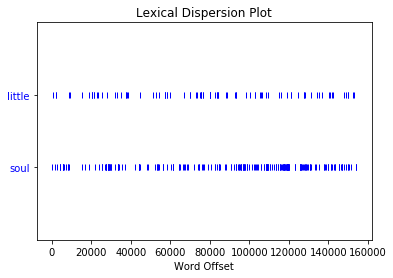

In [46]:
# Finally, the dispersion_plot() method provides a plot of word occurrences.
# These plots shed some light on what counts as 'similar' context.

waltText.dispersion_plot(['little', 'soul'])

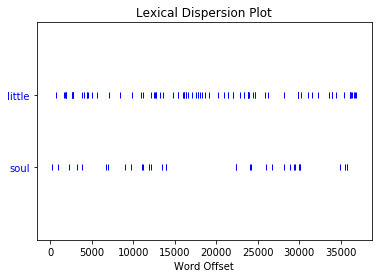

In [47]:
emilyText.dispersion_plot(['little', 'soul'])

## Contexts of the Self in Dickinson and Whitman

Let's use these methods to explore contexts of self-references within the works of our poets. Along with their stylistic innovations, both poets have been represented - maybe not accurately - in popular media as having particular personalities. We've all probably heard of the 'Belle of Amherst' and barbaric yawps. Allowing that popular conceptions of these poets' personalities may be fictions, their supposed intro- and extrovertedness are things we can interrogate using the Text module.

Dispersion plots show some interesting contrasts in the poets' use of personal pronouns. Keeping in mind that our samples are not the same size and that we have almost all of Dickinson's poetry but not all of Whitman's:

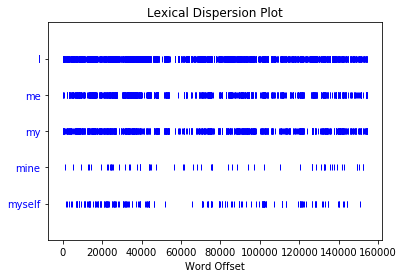

In [48]:
waltText.dispersion_plot(['I', 'me', 'my', 'mine', 'myself'])

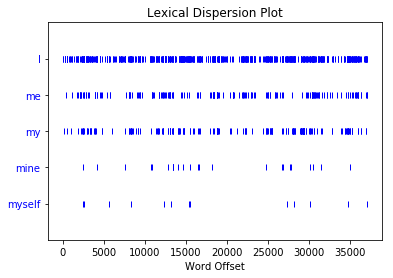

In [49]:
emilyText.dispersion_plot(['I', 'me', 'my', 'mine', 'myself'])

In [50]:
waltText.concordance('I')

Displaying 25 of 25 matches:
rite , ( for we are one ,) That should I after return , Or , long , long hence 
ous waves ,) Ever with pleas ' d smile I may keep on , Ever and ever yet the ve
 yet the verses owning -- as , first , I here and now Signing for Soul and Body
et to them my name , Walt Whitman BOOK I . INSCRIPTIONS One ' s - Self I Sing O
n BOOK I . INSCRIPTIONS One ' s - Self I Sing One ' s - self I sing , a simple 
S One ' s - Self I Sing One ' s - self I sing , a simple separate person , Yet 
 Masse . Of physiology from top to toe I sing , Not physiognomy alone nor brain
r brain alone is worthy for the Muse , I say the Form complete is worthier far 
far , The Female equally with the Male I sing . Of Life immense in passion , pu
under the laws divine , The Modern Man I sing . As I Ponder ' d in Silence As I
ws divine , The Modern Man I sing . As I Ponder ' d in Silence As I ponder ' d 
I sing . As I Ponder ' d in Silence As I ponder ' d in silence , Returning upon
 of perfect

In [51]:
emilyText.concordance('I')

Displaying 25 of 25 matches:
 I . LIFE . I . SUCCESS . [ Published in 
 I . SUCCESS . [ Published in " A Masque 
 so much joy ! ' T is so much joy ! If I should fail , what poverty ! And yet ,
 , what poverty ! And yet , as poor as I Have ventured all upon a throw ; Have 
 breath but breath ! And if , indeed , I fail , At least to know the worst is s
eat , No drearier can prevail ! And if I gain , -- oh , gun at sea , Oh , bells
n , And only the waves reply . VI . If I can stop one heart from breaking , I s
f I can stop one heart from breaking , I shall not live in vain ; If I can ease
eaking , I shall not live in vain ; If I can ease one life the aching , Or cool
e fainting robin Unto his nest again , I shall not live in vain . VII . ALMOST 
ain . VII . ALMOST ! Within my reach ! I could have touched ! I might have chan
thin my reach ! I could have touched ! I might have chanced that way ! Soft sau
 VIII . A wounded deer leaps highest , I ' ve heard the hunter tell ; ' T is bu
dress h

In [52]:
waltText.similar('I')

you they we it and not to all that what women here he or in now me of
ever as


In [53]:
emilyText.similar('I')

you they we he there and to not if it then she birds in one all just
such t know


## I What?

From the above results, one thing that may be interesting is to find out what kinds of words follow the poets' use of *I*. As a final part of our analysis, we will create two more set od frequency distributions and plots.

* Words that follow the word "I"
* Parts of speech of words that follow the word "I"

In [54]:
# The ContextIndex objects provide access to tokens which can be tagged using the part of speech tagger.

walt_pos = nltk.pos_tag(waltContextIndex.tokens())
emily_pos = nltk.pos_tag(emilyContextIndex.tokens())

In [55]:
# These are long lists - here's an example of some tagged tokens

emily_pos[100:110]

[('whose', 'WP$'),
 ('forbidden', 'JJ'),
 ('ear', 'VBP'),
 ('The', 'DT'),
 ('distant', 'JJ'),
 ('strains', 'NNS'),
 ('of', 'IN'),
 ('triumph', 'NN'),
 ('Break', 'NNP'),
 (',', ',')]

In [56]:
# Create a function to retrieve every token than follows the token "I"
# in the list of tokens that have been tagged with their parts of speech

def next_word(taggedList):
    i_index = []
    next_words = []
    idx = 0
    for t in taggedList:
        if t[0] == 'I':
            if t[1] == 'PRP':
                i_index.append(idx)
        idx += 1
    for i in i_index:
        next_words.append(taggedList[i+1])
    return next_words



In [57]:
# Get lists of POS tagged words which follow "I"

walt_I_what = next_word(walt_pos)
emily_I_what = next_word(emily_pos)
print(emily_I_what[:10])

[('.', '.'), ('.', '.'), ('should', 'MD'), ('Have', 'VBP'), ('fail', 'VBP'), ('gain', 'VBP'), ('can', 'MD'), ('shall', 'MD'), ('can', 'MD'), ('shall', 'MD')]


In [58]:
# Create frequency distributions

walt_I_posFD = FreqDist(w[1] for w in walt_I_what if w[0].isalpha()) # POS frequency only
walt_I_wposFD = FreqDist(w for w in walt_I_what if w[0].isalpha()) # word and POS

emily_I_posFD = FreqDist(w[1] for w in emily_I_what if w[0].isalpha()) # POS frequency only
emily_I_wposFD = FreqDist(w for w in emily_I_what if w[0].isalpha()) # word and POS

In [59]:
walt_I_posFD.most_common(20)

[('VBP', 2065),
 ('MD', 246),
 ('VBD', 237),
 ('RB', 102),
 ('VBG', 42),
 ('VB', 36),
 ('IN', 33),
 ('CC', 20),
 ('PRP', 16),
 ('NNP', 11),
 ('DT', 10),
 ('NN', 8),
 ('TO', 8),
 ('VBN', 7),
 ('JJ', 5),
 ('PRP$', 4),
 ('WP', 2),
 ('WRB', 1),
 ('WDT', 1),
 ('CD', 1)]

In [60]:
emily_I_posFD.most_common(20)

[('VBD', 193),
 ('VBP', 192),
 ('MD', 86),
 ('RB', 25),
 ('VB', 7),
 ('IN', 6),
 ('CC', 5),
 ('NN', 4),
 ('DT', 4),
 ('JJ', 3),
 ('VBG', 2),
 ('PRP$', 2),
 ('NNP', 1),
 ('WRB', 1),
 ('NNS', 1),
 ('RBR', 1),
 ('PRP', 1)]

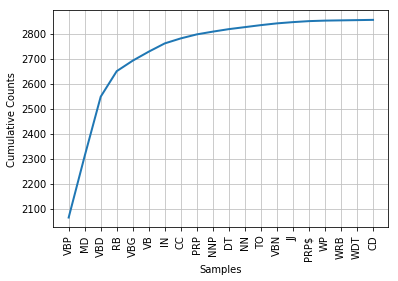

In [61]:
walt_I_posFD.plot(20, cumulative=True)

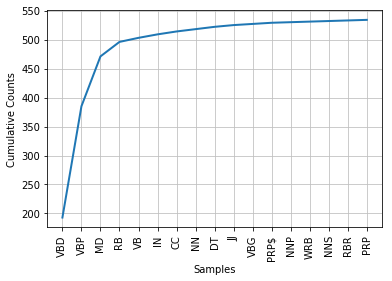

In [62]:
emily_I_posFD.plot(20, cumulative=True)

In [63]:
walt_I_wposFD.most_common(20)

[(('see', 'VBP'), 291),
 (('am', 'VBP'), 190),
 (('have', 'VBP'), 114),
 (('will', 'MD'), 113),
 (('hear', 'VBP'), 100),
 (('know', 'VBP'), 82),
 (('do', 'VBP'), 74),
 (('love', 'VBP'), 53),
 (('saw', 'VBD'), 50),
 (('think', 'VBP'), 37),
 (('too', 'RB'), 36),
 (('was', 'VBD'), 35),
 (('say', 'VBP'), 31),
 (('shall', 'MD'), 25),
 (('go', 'VBP'), 25),
 (('sing', 'VBP'), 24),
 (('believe', 'VBP'), 24),
 (('pass', 'VBP'), 24),
 (('give', 'VBP'), 24),
 (('swear', 'VBP'), 24)]

In [64]:
emily_I_wposFD.most_common(20)

[(('could', 'MD'), 25),
 (('had', 'VBD'), 22),
 (('should', 'MD'), 18),
 (('have', 'VBP'), 18),
 (('know', 'VBP'), 12),
 (('am', 'VBP'), 12),
 (('shall', 'MD'), 11),
 (('never', 'RB'), 11),
 (('thought', 'VBD'), 10),
 (('knew', 'VBD'), 9),
 (('heard', 'VBD'), 9),
 (('was', 'VBD'), 8),
 (('think', 'VBP'), 7),
 (('will', 'MD'), 7),
 (('would', 'MD'), 7),
 (('may', 'MD'), 6),
 (('said', 'VBD'), 6),
 (('see', 'VBP'), 6),
 (('wonder', 'VBP'), 6),
 (('felt', 'VBD'), 6)]

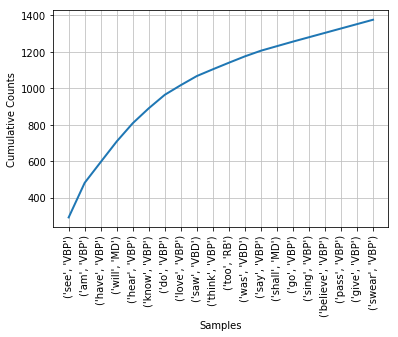

In [65]:
walt_I_wposFD.plot(20, cumulative=True)

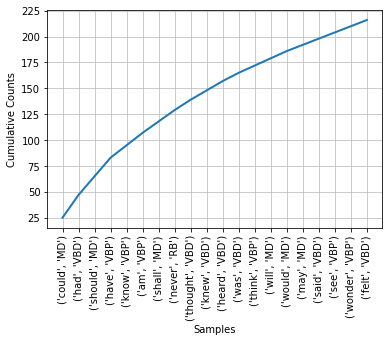

In [66]:
emily_I_wposFD.plot(20, cumulative=True)

## Extra: Finding Interesting Words

So we cheated here and used our knowledge of Emily Dickinson and Walt Whitman to pre-select some interesting words. There are ways to snoop out interesting words in cases when we don't have a cheater handy. Often, this involves removing stop words and exploring the frequencies of word lengths, parts of speech, etc.

We already have numerous examples of frequency distributions and part of speech tagging, so as a last exercise we will create two sets of tokens for both of our poets:

* All tokens minus stopwords
* Unique tokens minus stopwords

*Stopwords* are words which are commonly occurring but which usually don't convery much information - *a*, *and*, *the*, etc.

In [67]:
# We loaded the stopword corpus at the beginning of the tutorial

print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [68]:
engSw = stopwords.words('english')

In [69]:
engSw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [70]:
# Use the lists of words from the plaintext module

waltNoSw = [w for w in wwWords if w.lower() not in engSw and w.isalpha()] # alpha tokens only
emilyNoSw = [w for w in edWords if w.lower() not in engSw and w.isalpha()]

In [71]:
# Compare length of token lists with and without stopwords

print("Whitman tokens including stopwords:", len(wwWords))
print("Whitman tokens excluding stopwords:", len(waltNoSw))
print('\n')
print("Dickinson tokens including stopwords:", len(edWords))
print("Dickinson tokens excluding stopwords:", len(emilyNoSw))

Whitman tokens including stopwords: 154453
Whitman tokens excluding stopwords: 65089


Dickinson tokens including stopwords: 37156
Dickinson tokens excluding stopwords: 15790


In [72]:
wwUnique = set(waltNoSw)
edUnique = set(emilyNoSw)

print("Whitman unique tokens excluding stopwords:", len(wwUnique))
print("Whitman lexical diversity excluding stopwords:", len(wwUnique) / len(waltNoSw))
print('\n')
print("Dickinson unique tokens excluding stopwords:", len(edUnique))
print("Dickinson lexical diversity excluding stopwords:", len(edUnique) / len(emilyNoSw))

Whitman unique tokens excluding stopwords: 13941
Whitman lexical diversity excluding stopwords: 0.21418365622455407


Dickinson unique tokens excluding stopwords: 6169
Dickinson lexical diversity excluding stopwords: 0.39069031032298923


## Try It!

1. Compare frequency distributions of token lists with and without stopwords.
2. Create frequency distributions of word lengths using a set of unique tokens.